In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# dataset = pd.read_csv("./R03_25")
# dataset = pd.read_csv("C:\\Users\\papir\\Downloads\\Telegram Desktop\\Task wise combined csv files\\Task wise combined csv files\\R03_25")
dataset = pd.read_csv("/content/drive/MyDrive/R03_25")

In [6]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [7]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [8]:
occipital_dataset = pd.DataFrame()
occipital_region = ['O1..', 'Oz..', 'O2..', 'Poz.','Iz..']
for column in dataset.columns:
    if column in occipital_region:
        occipital_dataset[column] = dataset[column]
occipital_dataset.head()


,Poz.,O1..,Oz..,O2..,Iz..
0,-68.0,-51.0,-56.0,-124.0,-28.0
1,-82.0,-59.0,-70.0,-149.0,-40.0
2,-91.0,-67.0,-77.0,-153.0,-37.0
3,-100.0,-67.0,-72.0,-148.0,-26.0
4,-117.0,-75.0,-82.0,-161.0,-35.0


In [9]:
data = occipital_dataset
data['label'] = dataset['label']

In [10]:
data.head()

,Poz.,O1..,Oz..,O2..,Iz..,label
0,-68.0,-51.0,-56.0,-124.0,-28.0,0
1,-82.0,-59.0,-70.0,-149.0,-40.0,0
2,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-100.0,-67.0,-72.0,-148.0,-26.0,0
4,-117.0,-75.0,-82.0,-161.0,-35.0,0


In [11]:
data.shape

(493200, 6)

In [12]:
len(data.columns)
print(data.columns)

Index(['Poz.', 'O1..', 'Oz..', 'O2..', 'Iz..', 'label'], dtype='object')


In [13]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)

num_samples = X_train.shape[0]
num_features = X_train.shape[1]


In [14]:
train_accuracies = []
val_accuracies = []
losses = []

In [20]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [23]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, validation_split=0.1,epochs=1, callbacks=[early_stopping])
    train_accuracies.append(history.history['accuracy'][0])
    val_accuracies.append(history.history['val_accuracy'][0])
    losses.append(history.history['loss'][0])


epoch 1/100
11097/11097 [==============================] - 120s 10ms/step - loss: 1.0399 - accuracy: 0.5001 - val_loss: 1.0403 - val_accuracy: 0.4984
epoch 2/100
11097/11097 [==============================] - 107s 10ms/step - loss: 1.0363 - accuracy: 0.5013 - val_loss: 1.0381 - val_accuracy: 0.4983
epoch 3/100
11097/11097 [==============================] - 108s 10ms/step - loss: 1.0336 - accuracy: 0.5019 - val_loss: 1.0331 - val_accuracy: 0.4989
epoch 4/100
11097/11097 [==============================] - 104s 9ms/step - loss: 1.0316 - accuracy: 0.5023 - val_loss: 1.0318 - val_accuracy: 0.4994
epoch 5/100
11097/11097 [==============================] - 106s 10ms/step - loss: 1.0292 - accuracy: 0.5029 - val_loss: 1.0272 - val_accuracy: 0.4999
epoch 6/100
11097/11097 [==============================] - 109s 10ms/step - loss: 1.0264 - accuracy: 0.5040 - val_loss: 1.0255 - val_accuracy: 0.5036
epoch 7/100
11097/11097 [==============================] - 104s 9ms/step - loss: 1.0252 - accuracy: 0

KeyboardInterrupt: ignored

In [24]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 1.0078
Test Accuracy: 0.5178


In [25]:
print(train_accuracies)
print(len(train_accuracies))

[0.5000647902488708, 0.501298189163208, 0.5019177198410034, 0.5022584795951843, 0.5028611421585083, 0.5039988160133362, 0.5049309730529785, 0.5052322745323181, 0.5061869025230408, 0.5071303248405457, 0.5079075694084167, 0.5080990195274353, 0.5086960196495056, 0.5090283155441284, 0.5104025602340698, 0.5100815296173096, 0.5107602477073669, 0.5110868811607361, 0.5110446810722351, 0.5114727020263672, 0.5119655132293701, 0.5122414827346802, 0.5125625133514404, 0.5133087635040283, 0.5134467482566833, 0.5138241052627563, 0.5137537121772766, 0.5138691663742065, 0.5138860940933228, 0.5141620635986328, 0.5142690539360046, 0.5145478248596191, 0.5144267678260803, 0.5150885581970215, 0.5152856707572937, 0.5156489610671997, 0.515367329120636, 0.5155588388442993, 0.515984058380127, 0.5162206292152405, 0.515730619430542]
41


ValueError: ignored

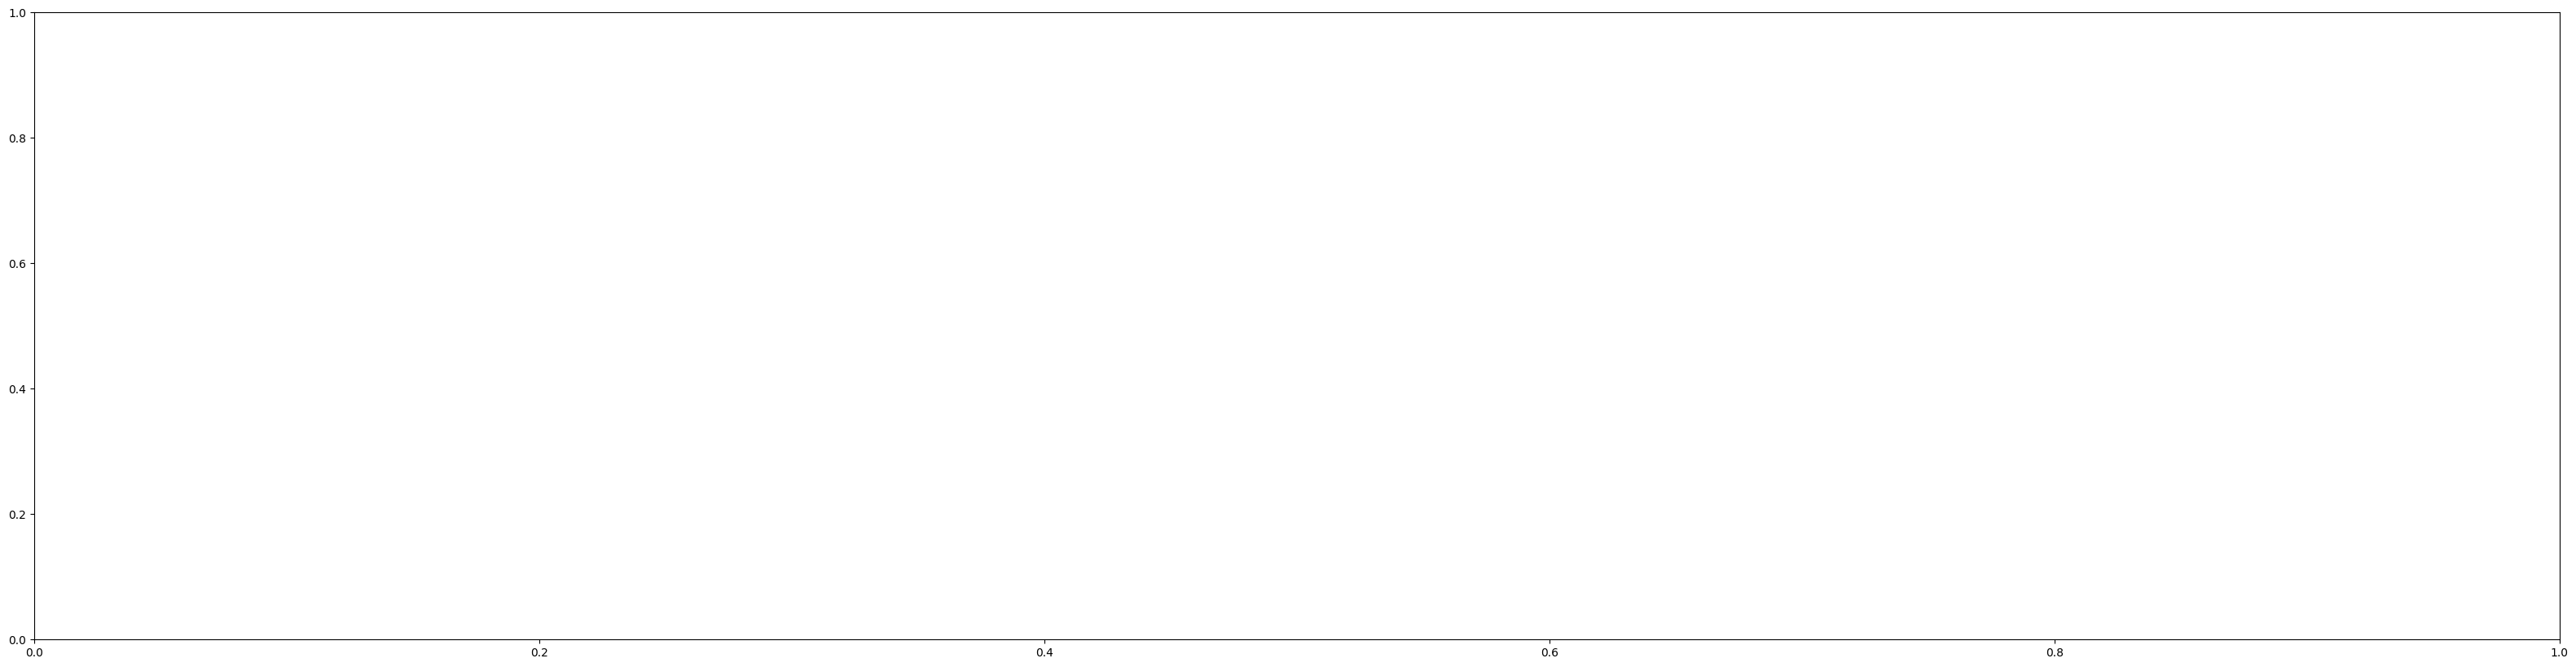

In [26]:
import matplotlib.pyplot as plt
epochs_list = [i for i in range(1,len(train_accuracies))]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, len(train_accuracies)))

plt.show()

In [27]:
print(max(train_accuracies))

0.5162206292152405


In [28]:
y_test_data = np.array(Y_test)

y_test_data.shape

(98640,)

In [29]:
from sklearn.metrics import accuracy_score

input_data = np.array(X_test_reshaped[2390]).reshape(1,X_test_reshaped[0].shape[0], X_test_reshaped[0].shape[1])

print(input_data.shape)
pred = model.predict(input_data)
y_pred_labels = np.argmax(pred, axis=1)

print("True Label:", Y_test.iloc[0])
print("Predicted Label:", y_pred_labels[0])
print("Predicted Probabilities:", pred)



(1, 5, 1)
1/1 [==============================] - 1s 938ms/step
True Label: 0
Predicted Label: 0
Predicted Probabilities: [[0.53905904 0.22556213 0.23537885]]


##

In [30]:
conf_matrix = confusion_matrix(Y_test, y_pred_labels)
print("Confusion matrix:  ")
print(conf_matrix)

NameError: ignored

In [ ]:
class_report = classficition_report(Y_test, y_pred_labels)
print(class_report)

In [ ]:
data.columns

Index(['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..',
       'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.',
       'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.',
       'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..',
       'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.',
       'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..',
       'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..',
       'Iz..', 'label'],
      dtype='object')